In [18]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
import time
import datetime
import statistics
import pandas as pd
import numpy as np

#%matplotlib notebook

In [6]:
interactions = {} #key is student tuple, value is a list of timestamps

with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        t = int(t)
        id1 = int(id1); id2 = int(id2);
        
        #ts = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600)))
        students = (min(id1, id2), max(id1, id2))
        
        if students in interactions:
            duration = t - interactions[students][-1]
            if duration <= 0:
                print("duration ", duration)
            interactions[students].append(t)
        else:
            interactions[students] = [t]
            
#there aren't double reports, and timestamps are in increasing order

^^ Making sure there aren't double reports and that the timestamps are in chronological order

In [16]:
interactions2 = {} #key is student tuple, value is a list of list of start and end timestamps

with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        t = int(t)
        id1 = int(id1); id2 = int(id2);
        
        #ts = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600)))
        students = (min(id1, id2), max(id1, id2))
        
        if students in interactions2:
            duration = t - interactions2[students][-1][1]
            if duration <= 20:
                interactions2[students][-1][1] = t
            else:
                interactions2[students].append([t - 20, t])
        else:
            interactions2[students] = [[t - 20, t]]
            

number_of_interactions_per_pair = []
for key in interactions2:
    number_of_interactions_per_pair.append(len(interactions2[key]))
print("len", len(number_of_interactions_per_pair))
print("total interactions", sum(number_of_interactions_per_pair))
print("mean", statistics.mean(number_of_interactions_per_pair))
print("median", statistics.median(number_of_interactions_per_pair))
print("mode", statistics.mode(number_of_interactions_per_pair))
print("max", max(number_of_interactions_per_pair))

number_of_interactions_per_student = {}

len 5818
total interactions 46025
mean 7.910794087315229
median 2.0
mode 1
max 265


^^ Colapsing the interactions and getting stats from them

In [31]:
labels = ['Delta', 'Total Interactions', 'Mean', 'Median', 'Max']
indexes = []
stats_data = []

for delta in range(20, 3620, 20):
    print(delta)
    indexes.append(delta)
    
    interactions2 = {} #key is student tuple, value is a list of list of start and end timestamps

    with open("data/original/High-School_data_2013.csv", 'r') as infile:
        reader = csv.reader(infile, delimiter=" ")
        for t, id1, id2, cls1, cls2 in reader:
            t = int(t)
            id1 = int(id1); id2 = int(id2);

            #ts = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600)))
            students = (min(id1, id2), max(id1, id2))

            if students in interactions2:
                duration = t - interactions2[students][-1][1]
                if duration <= delta:
                    interactions2[students][-1][1] = t
                else:
                    interactions2[students].append([t - 20, t])
            else:
                interactions2[students] = [[t - 20, t]]


    number_of_interactions_per_pair = []
    for key in interactions2:
        number_of_interactions_per_pair.append(len(interactions2[key]))
    
    stats_data.append([delta,
                       sum(number_of_interactions_per_pair), 
                        statistics.mean(number_of_interactions_per_pair),
                        statistics.median(number_of_interactions_per_pair),
                        max(number_of_interactions_per_pair)])

frame = pd.DataFrame(data = stats_data, index = indexes, columns = labels)
print(frame)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
      Delta  Total Interactions       Mean  Median  Max
20       20               67613  11.621348     3.0  498
40       40               53224   9.14816

^^ Collecting the stats on the data while changing the duration we set to count as one interaction

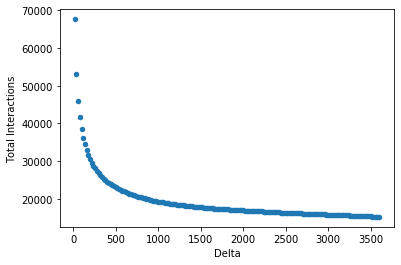

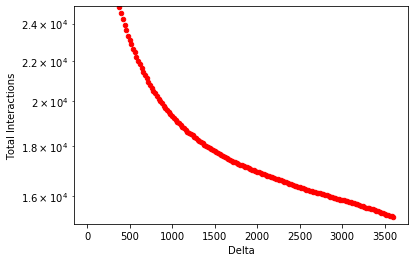

In [34]:

frame.plot(kind='scatter', x='Delta', y='Total Interactions')
frame.plot(kind='scatter', x='Delta', y='Total Interactions', color='red', ylim=(15000, 25000), logy=True)
plt.show()

^^ Graphs